<a href="https://colab.research.google.com/github/osamaalghamdi2002/credit-risk-prediction/blob/main/credit-risk-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Know Your Data

This part of the code is responsible for loading the dataset and displaying basic information to understand its structure and content.



In [124]:
!pip install kaggle

## https://www.kaggle.com/competitions/GiveMeSomeCredit/data


# Target Variable: (((SeriousDlqin2yrs)))
# This is the binary target variable indicating whether an individual has experienced financial distress
# (e.g., delinquency of 90+ days or worse) within the next two years.
# - 1: Financial distress (e.g., delinquency occurred)
# - 0: No financial distress
# The goal is to predict this value based on the input features provided in the dataset.


# 2. RevolvingUtilizationOfUnsecuredLines
#    - Description: Total balance on credit cards and personal lines of credit (excluding real estate and installment debt).
#    - Type: Percentage

# 3. Age
#    - Description: Age of borrower in years.
#    - Type: Integer

# 4. NumberOfTime30-59DaysPastDueNotWorse
#    - Description: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
#    - Type: Integer

# 5. DebtRatio
#    - Description: Monthly debt payments, alimony, and living costs divided by monthly gross income.
#    - Type: Percentage

# 6. MonthlyIncome
#    - Description: Monthly income of the borrower.
#    - Type: Real

# 7. NumberOfOpenCreditLinesAndLoans
#    - Description: Number of open loans (e.g., car loans, mortgages) and lines of credit (e.g., credit cards).
#    - Type: Integer

# 8. NumberOfTimes90DaysLate
#    - Description: Number of times borrower has been 90 days or more past due.
#    - Type: Integer

# 9. NumberRealEstateLoansOrLines
#    - Description: Number of mortgage and real estate loans, including home equity lines of credit.
#    - Type: Integer

# 10. NumberOfTime60-89DaysPastDueNotWorse
#     - Description: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
#     - Type: Integer

# 11. NumberOfDependents
#     - Description: Number of dependents in the family, excluding the borrower (e.g., spouse, children).
#     - Type: Integer


In [125]:
import pandas as pd


# Load the data files
df = pd.read_csv("/content/sample_data/cs-training.csv")

# Display basic information about each dataset
print("Training Data Info:")
print(df.info())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non

2. Pre-processing
We check for missing values to ensure data completeness and display the first few rows of the dataset.

In [126]:
# Check for any missing values and display the first few rows of the training data
print("\nTraining Data - Missing Values:")
print(df.isnull().sum())

print("\nFirst few rows of Training Data:")
display(df.head())



Training Data - Missing Values:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

First few rows of Training Data:


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


We split the dataset into training and testing sets for further processing.



In [127]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Check the sizes of the resulting DataFrames
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)

Train DataFrame Shape: (120000, 12)
Test DataFrame Shape: (30000, 12)


A. Outlier Detection and Removal

Before removing outliers, we visualize the distribution of selected numerical columns to identify any anomalies.



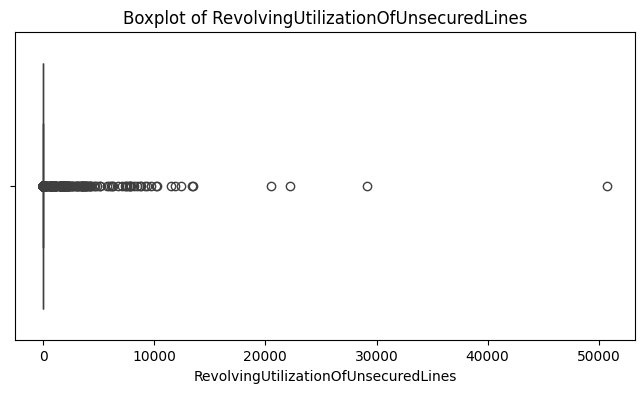

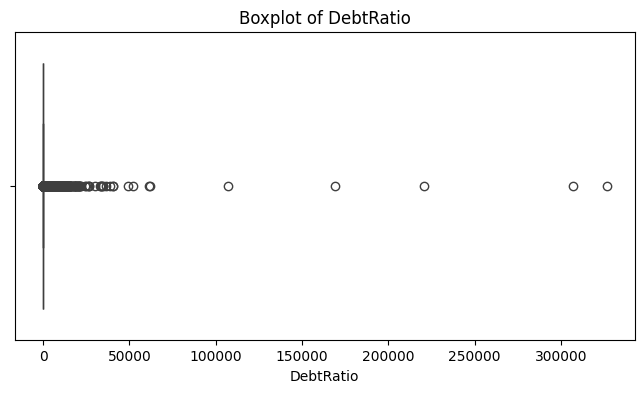

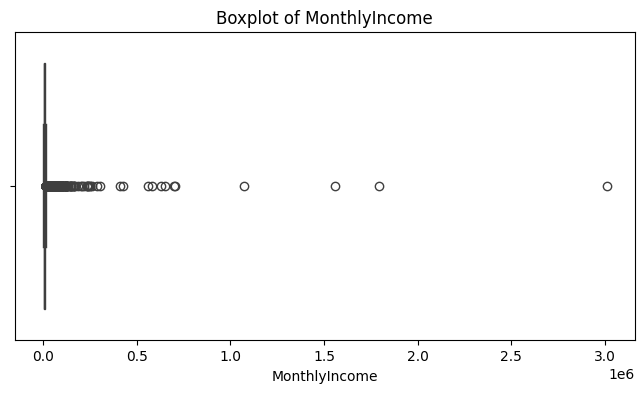

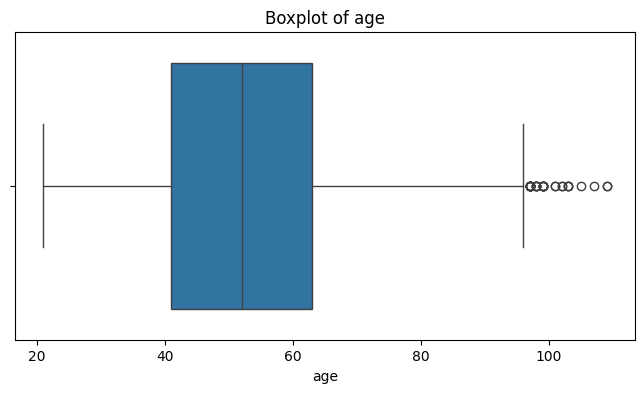

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns selected for visualization and outlier removal:
# - RevolvingUtilizationOfUnsecuredLines: Credit utilization ratio; extreme values may indicate data issues or unusual behavior.
# - DebtRatio: High debt-to-income ratios can skew analysis and affect model learning.
# - MonthlyIncome: Critical for financial analysis; outliers can distort imputations or predictions.
# - age: Values below 18 or above 100 are likely unrealistic or irrelevant to the problem.

# Columns to visualize
columns_to_visualize = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']

# Plot boxplots for each column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

We define a function to remove outliers using the IQR method and apply it to the training data.



In [129]:
def remove_outliers(df, column_names, iqr_multiplier=2):
    for column_name in column_names:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

# Columns to clean
columns_to_clean = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']

# Remove outliers for selected columns
train_df_cleaned = remove_outliers(train_df, columns_to_clean)

# Check results
print("Original DataFrame shape:", train_df.shape)
print("Cleaned DataFrame shape:", train_df_cleaned.shape)

Original DataFrame shape: (120000, 12)
Cleaned DataFrame shape: (91057, 12)


After removing outliers, we visualize the data again to confirm the changes.

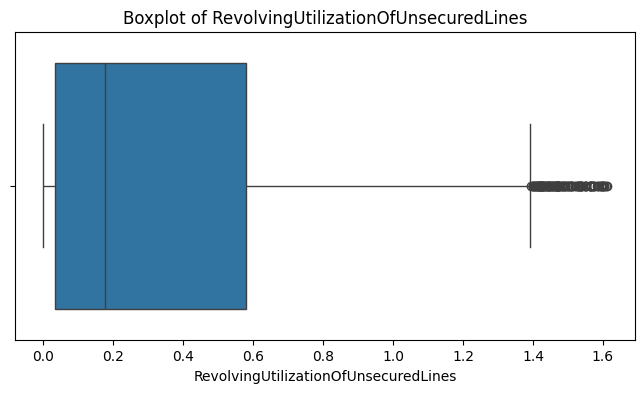

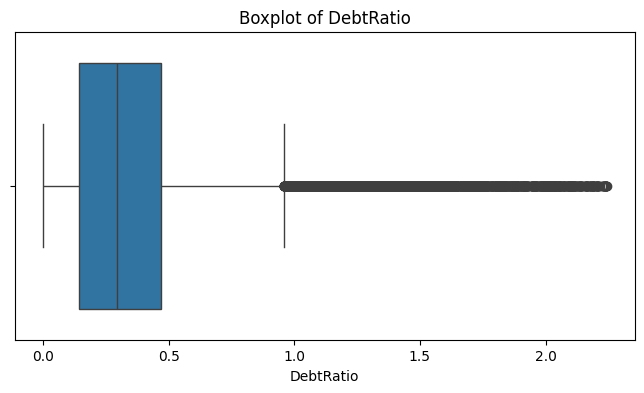

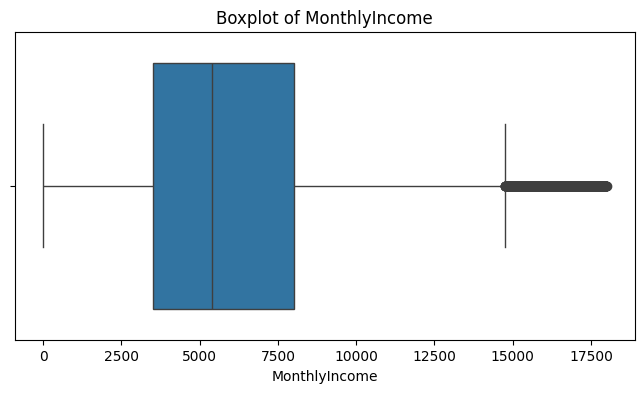

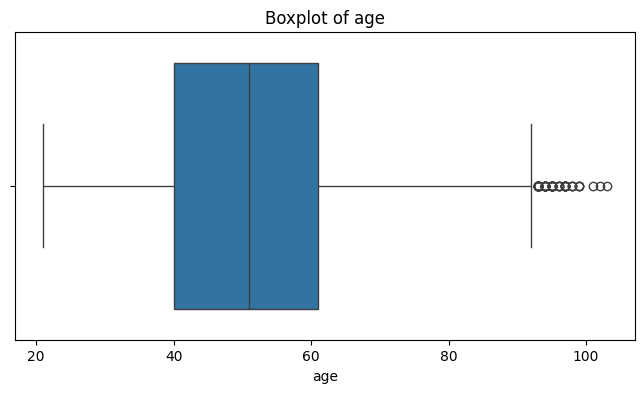

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns selected for visualization and outlier removal:
# - RevolvingUtilizationOfUnsecuredLines: Credit utilization ratio; extreme values may indicate data issues or unusual behavior.
# - DebtRatio: High debt-to-income ratios can skew analysis and affect model learning.
# - MonthlyIncome: Critical for financial analysis; outliers can distort imputations or predictions.
# - age: Values below 18 or above 100 are likely unrealistic or irrelevant to the problem.

# Columns to visualize
columns_to_visualize = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']

# Plot boxplots for each column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df_cleaned, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [131]:
columns_to_visualize = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']


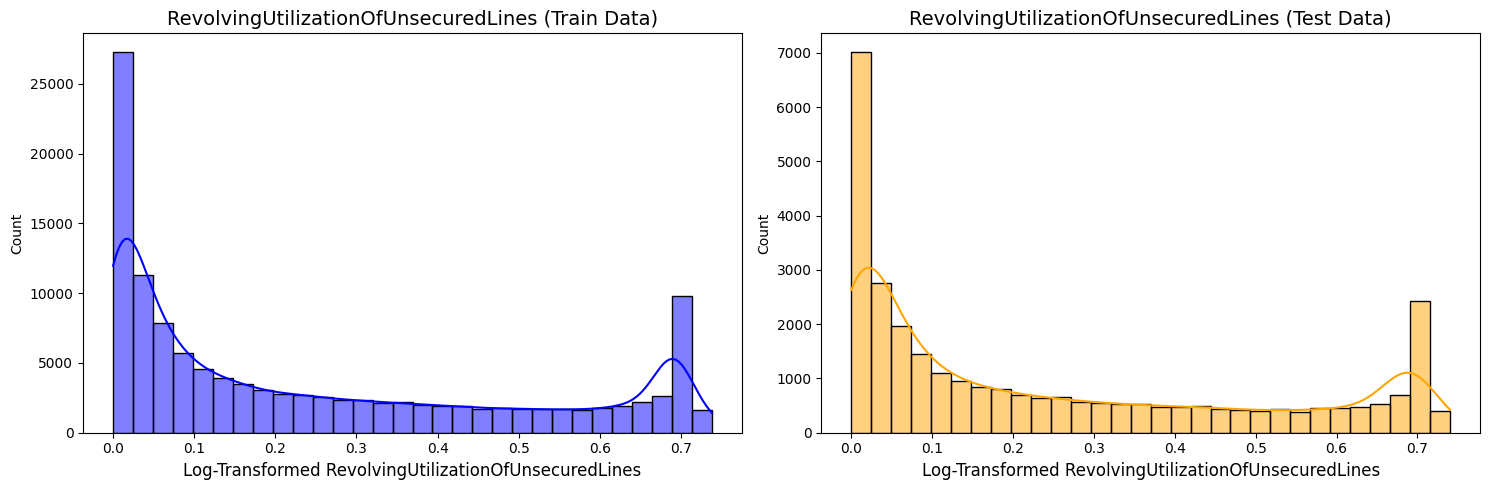

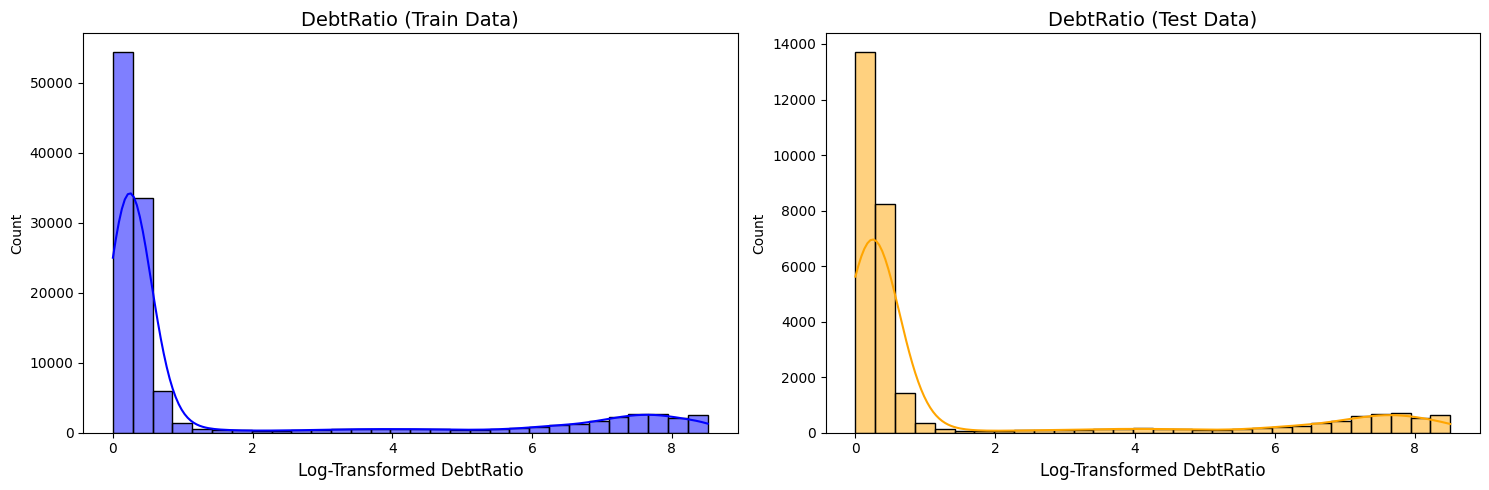

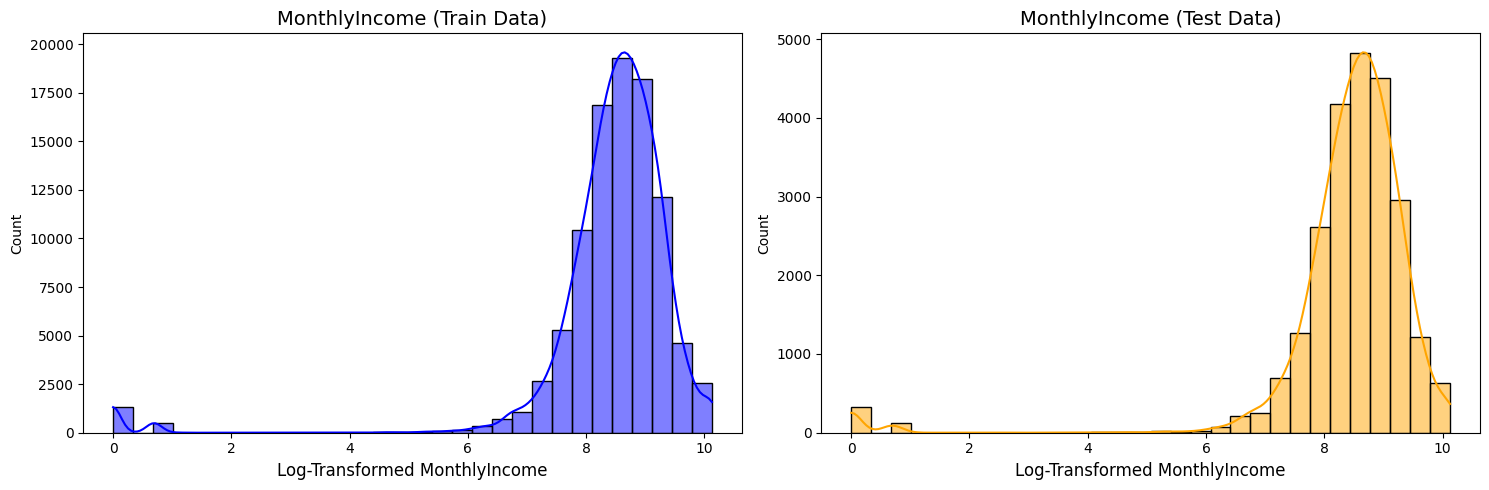

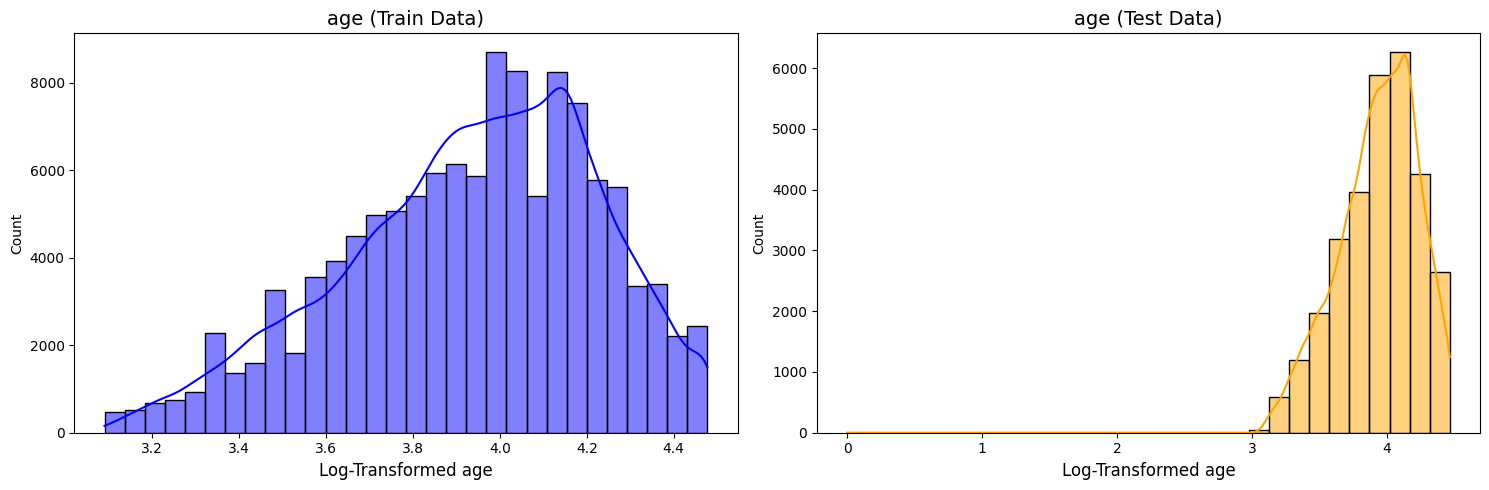

In [132]:
for i in columns_to_visualize:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Train Data Plot with Outlier Capping and Log Transformation
    capped_train = np.clip(train_df[i], a_min=0, a_max=train_df[i].quantile(0.99))  # Cap at 99th percentile
    log_transformed_train = np.log1p(capped_train)  # Apply log transformation

    axes[0].set_title(i + ' (Train Data)', fontsize=14)
    sns.histplot(log_transformed_train, ax=axes[0], color='blue', bins=30, kde=True)
    axes[0].set_xlabel(f'Log-Transformed {i}', fontsize=12)

    # Test Data Plot with Outlier Capping and Log Transformation
    capped_test = np.clip(test_df[i], a_min=0, a_max=test_df[i].quantile(0.99))  # Cap at 99th percentile
    log_transformed_test = np.log1p(capped_test)  # Apply log transformation

    axes[1].set_title(i + ' (Test Data)', fontsize=14)
    sns.histplot(log_transformed_test, ax=axes[1], color='orange', bins=30, kde=True)
    axes[1].set_xlabel(f'Log-Transformed {i}', fontsize=12)

    plt.tight_layout()
    plt.show


B. Imputing Missing Values


We handle missing values using mean imputation.





In [133]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Define features for imputation
features_for_income_imputation = ['MonthlyIncome', 'age', 'NumberOfOpenCreditLinesAndLoans', 'DebtRatio']
features_for_dependents_imputation = ['NumberOfDependents', 'age', 'MonthlyIncome']

# Impute 'MonthlyIncome'
imputer.fit(df[features_for_income_imputation])  # Fit only on training data
df[features_for_income_imputation] = imputer.transform(df[features_for_income_imputation])  # Transform training data

# Impute 'NumberOfDependents'
imputer.fit(df[features_for_dependents_imputation])  # Fit only on training data
df[features_for_dependents_imputation] = imputer.transform(df[features_for_dependents_imputation])  # Transform training data


In [134]:
print("\nMissing values in Train Data:")
print(df.isnull().sum())
print("\nMissing values in Test Data:")
print(df.head())


Missing values in Train Data:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Missing values in Test Data:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0           1                 1                              0.766127  45.0   
1           2                 0                              0.957151  40.0   
2           3                 0                              0.658180  38.0   
3           4                 0                              0.233810  30.0   
4           5              

C. Normalization
We apply Z-score normalization to all numeric features except the target variable.

z-sore

In [135]:
def z_score_normalization_exclude_target(df, target_column):
    """
    Apply Z-score normalization to all numeric columns except the target column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_column (str): The name of the target column to exclude.

    Returns:
    pd.DataFrame: DataFrame with normalized numeric feature columns.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns
    feature_columns = numeric_columns.drop(target_column)  # Exclude the target column
    for column in feature_columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df

# Example usage:
# Assuming 'train_data' is your DataFrame and 'target' is the target column
df = z_score_normalization_exclude_target(df, 'SeriousDlqin2yrs')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-1.732033,1,-0.021150,-0.493858,0.376592,-0.172833,0.190194,0.883654,-0.063793,4.409531,-0.057852,1.129383
1,-1.732010,0,-0.020385,-0.832339,-0.100419,-0.173167,-0.316000,-0.865294,-0.063793,-0.901280,-0.057852,0.220626
2,-1.731987,0,-0.021582,-0.967732,0.138087,-0.173185,-0.281684,-1.253949,0.176055,-0.901280,-0.057852,-0.688131
3,-1.731964,0,-0.023281,-1.509302,-0.100419,-0.173209,-0.261654,-0.670966,-0.063793,-0.901280,-0.057852,-0.688131
4,-1.731941,0,-0.020585,-0.223073,0.138087,-0.173215,4.418929,-0.282311,-0.063793,-0.016145,-0.057852,-0.688131


We also apply Min-Max normalization to scale features between 0 and 1.

In [136]:
# Min-Max normalization to scale between 0 and 1
df = (df - df.min()) / (df.max() - df.min())

print(df)

        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0         0.000000               1.0                          1.510859e-05   
1         0.000007               0.0                          1.887574e-05   
2         0.000013               0.0                          1.297981e-05   
3         0.000020               0.0                          4.610905e-06   
4         0.000027               0.0                          1.789145e-05   
...            ...               ...                                   ...   
149995    0.999973               0.0                          8.021193e-07   
149996    0.999980               0.0                          5.911200e-06   
149997    0.999987               0.0                          4.852172e-06   
149998    0.999993               0.0                          0.000000e+00   
149999    1.000000               0.0                          1.676822e-05   

             age  NumberOfTime30-59DaysPastDueNotWorse     Debt

#Processing

We split the data into training, validation, and test sets to evaluate the model's performance.



In [137]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame and you have features (X) and target (y)
X = df.drop('SeriousDlqin2yrs', axis=1)  # Replace 'target_column' with the actual target column name
y = df['SeriousDlqin2yrs']

# Step 1: Split into train + validation/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train, X_val, X_test = X_train.values, X_val.values, X_test.values
y_train, y_val, y_test = y_train.values, y_val.values, y_test.values

 Supervised Learning - Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
# n_estimators = 100 (default), but you can adjust it for better performance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.9349


A. Supervised Learning - *KNN*

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model
# n_neighbors = 5 is the default; you can adjust it based on your needs
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")


KNN Accuracy: 0.9319666666666667


A. Supervised Learning - Logistic Regression

In [140]:
# prompt: MAKE MA MODEL Logistic Regression

from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # You can adjust max_iter if needed

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model (example using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9331


We define a neural network model using Keras and train it on the training data.

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [142]:

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust input_dim to match feature count
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Manually setting the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Adjust epochs as needed
    batch_size=32,  # Adjust batch size as needed
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9312 - loss: 0.2528 - val_accuracy: 0.9384 - val_loss: 0.1886
Epoch 2/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9355 - loss: 0.1953 - val_accuracy: 0.9380 - val_loss: 0.1891
Epoch 3/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9349 - loss: 0.1929 - val_accuracy: 0.9385 - val_loss: 0.1840
Epoch 4/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9369 - loss: 0.1882 - val_accuracy: 0.9390 - val_loss: 0.1841
Epoch 5/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9354 - loss: 0.1932 - val_accuracy: 0.9389 - val_loss: 0.1835
Epoch 6/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9354 - loss: 0.1919 - val_accuracy: 0.9390 - val_loss: 0.1839
Epoch 7/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9343 - loss: 0.1940 - val_accuracy: 0.9386 - val_loss: 0.1864
Epoch 8/20
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9367 - loss: 0.1873 - val_accur


We visualize the training loss and accuracy over epochs to assess the model's performance.





Accuracy values and averages have been saved to accuracy_log.txt.
Length of loss: 20
Length of accuracy: 20


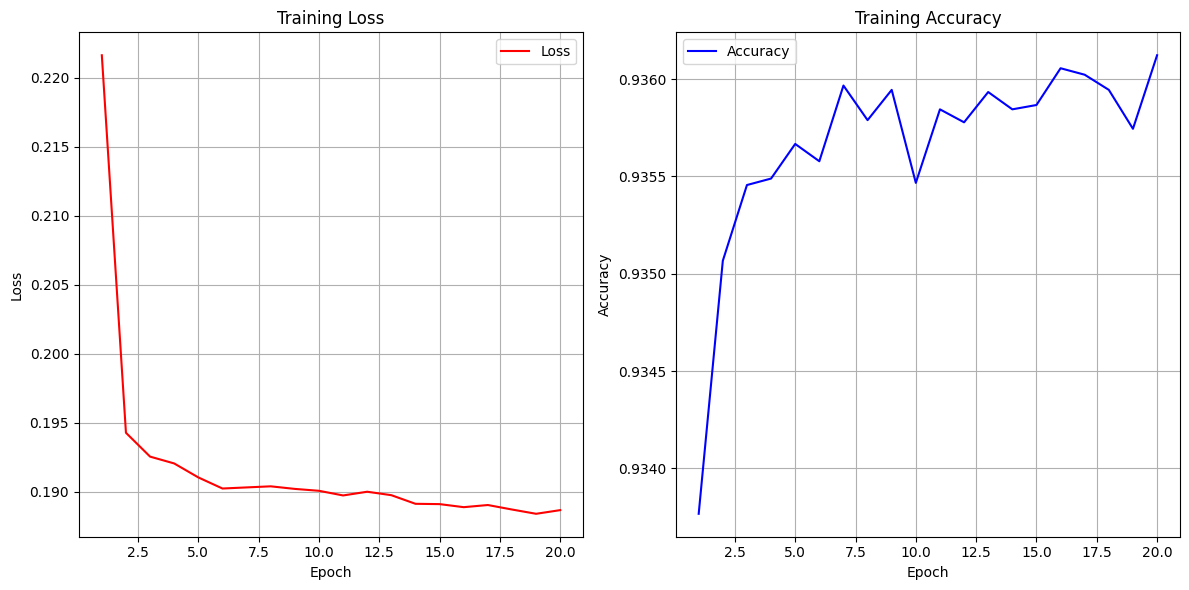

In [143]:
import matplotlib.pyplot as plt
import os

# Extract accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Calculate the averages
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)

# Specify the file to save the accuracy
file_path = "accuracy_log.txt"

# Append accuracy values and averages to the file
with open(file_path, "a") as file:
    file.write("New Run:\n")
    file.write("Train Accuracy: " + ", ".join(map(str, train_accuracy)) + "\n")
    file.write("Validation Accuracy: " + ", ".join(map(str, val_accuracy)) + "\n")
    file.write(f"Average Train Accuracy: {avg_train_accuracy:.4f}\n")
    file.write(f"Average Validation Accuracy: {avg_val_accuracy:.4f}\n")
    file.write("-" * 50 + "\n")

print(f"Accuracy values and averages have been saved to {file_path}.")
# Extract loss and accuracy from the history object
history_dict = history.history
loss = history_dict['loss']
accuracy = history_dict['accuracy']

# Check if loss and accuracy have the same length
print(f"Length of loss: {len(loss)}")
print(f"Length of accuracy: {len(accuracy)}")

# Plotting loss and accuracy
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss)+1), loss, label='Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy)+1), accuracy, label='Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()